# Where is my university in the world ranking?

There are so many universities in the world. And that's why I do want to know the ranking trend for my university and see if it is getting better or not, though the ranking is somehow useless in real cases.

Credits: https://www.kaggle.com/mylesoneill/d/mylesoneill/world-university-rankings/my-university-s-ranking-over-time/code by Myles O'Neill

In [1]:
# Plot the figures inline
%matplotlib inline

# Import packages
import numpy as np
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = 16, 12

# The name of my university
my_university_name = ['University of Alberta']

In [2]:
# Import data
timesData = pd.read_csv("../data/timesData.csv")
shanghaiData = pd.read_csv("../data/shanghaiData.csv")
cwurData = pd.read_csv("../data/cwurData.csv")

In [3]:
times_plot_data = timesData[timesData.university_name.isin(my_university_name)][['world_rank','year']]
shanghai_plot_data = shanghaiData[shanghaiData.university_name.isin(my_university_name)][['world_rank','year']]
cwur_plot_data = cwurData[cwurData.institution.isin(my_university_name)][['world_rank','year']]

In [4]:
times_plot_data['source'] = 'Times'
shanghai_plot_data['source'] = 'Shanghai'
cwur_plot_data['source'] = 'CWUR'

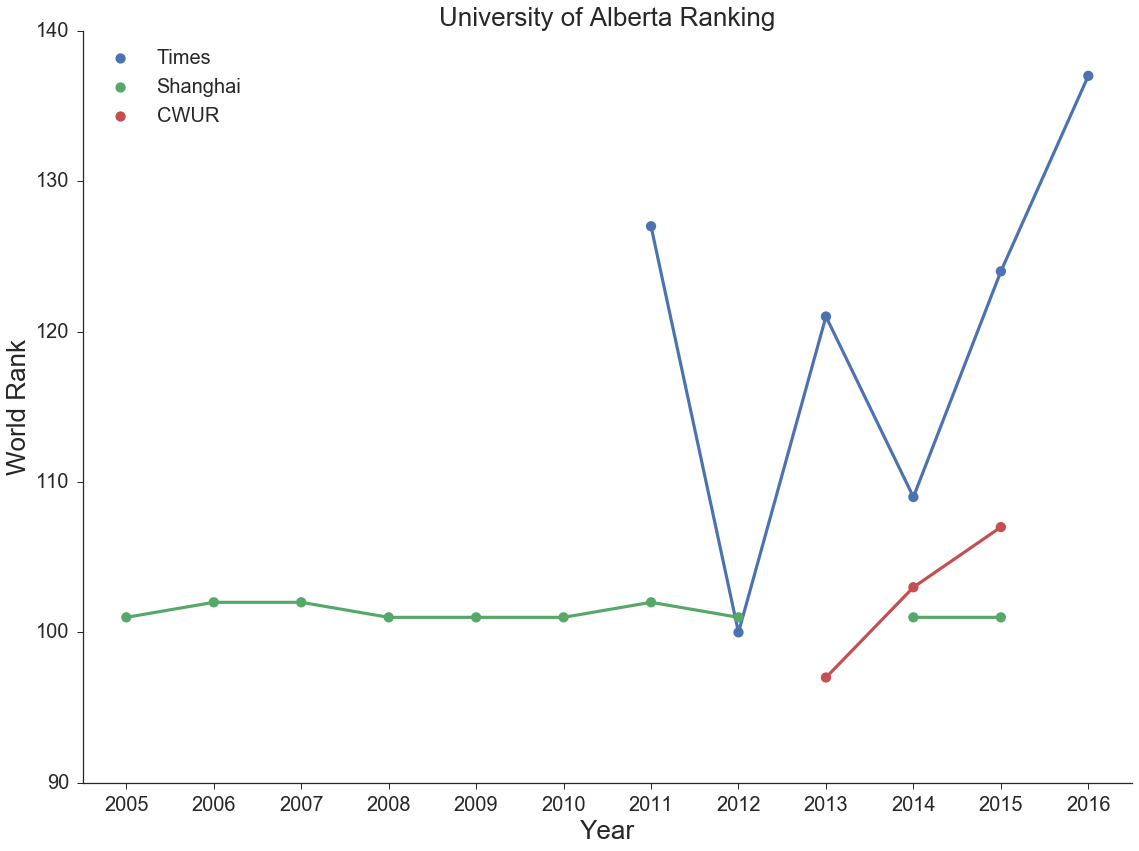

In [5]:
# Parse the first number in rank for data ranges
times_plot_data['world_rank'] = times_plot_data['world_rank'].str.split('-').str[0]
shanghai_plot_data['world_rank'] = shanghai_plot_data['world_rank'].str.split('-').str[0]

plot_data = times_plot_data.append(shanghai_plot_data).append(cwur_plot_data)
plot_data['world_rank'] = plot_data['world_rank'].astype(int)
ax = sns.pointplot(x='year',y='world_rank',hue='source',data=plot_data);

plt.title(my_university_name[0] + " Ranking", fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)    
plt.ylabel("World Rank", fontsize=26)  
plt.xlabel("Year", fontsize=26) 
plt.tight_layout()
plt.legend(loc='upper left',fontsize=20)
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
